<a href="https://colab.research.google.com/github/lluisdn/TFM/blob/Post-calibration/Probs_power_law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import and data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression
!pip install powerlaw
import powerlaw
from scipy.stats import linregress

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Shape probabilities and labels VANILLA MODEL
data = np.load('framework.npy')
print(data)
print(data.shape)
probs=data[:,0]
labels=data[:,1]
#Shape probabilities and labels TEMPERATURE SCALING MODEL
data_temp = np.load('framework_temperature (1).npy')
print(data_temp)
print(data_temp.shape)
probs_temp=data_temp[:,0]
labels_temp=data_temp[:,1]

#Shape probabilities and labels MATRIX MODEL
"""
data_matrix= np.load('framework_matrix')
print(data_matrix)
print(data_matrix.shape)
probs_matrix=data[:,0]
labels_matrix=data[:,1]
"""

[[2.3771131e-03 0.0000000e+00]
 [2.1421331e-06 0.0000000e+00]
 [2.2179495e-07 0.0000000e+00]
 ...
 [9.7567332e-05 0.0000000e+00]
 [2.5938450e-08 0.0000000e+00]
 [2.9784957e-08 0.0000000e+00]]
(800000, 2)
[[2.9951551e-03 0.0000000e+00]
 [3.5699804e-06 0.0000000e+00]
 [4.0462302e-07 0.0000000e+00]
 ...
 [1.3935372e-04 0.0000000e+00]
 [5.1446115e-08 0.0000000e+00]
 [5.8750285e-08 0.0000000e+00]]
(800000, 2)


"\ndata_matrix= np.load('framework_matrix')\nprint(data_matrix)\nprint(data_matrix.shape)\nprobs_matrix=data[:,0]\nlabels_matrix=data[:,1]\n"

In [ ]:
np.min(probs[0:100])

1.3884583e-12

#**Probability log-plot VANILA MODEL**

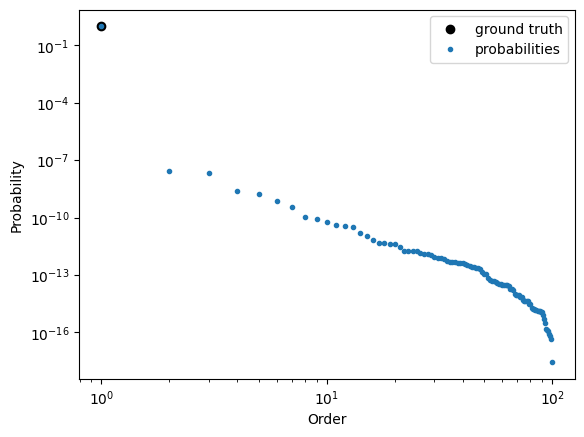

In [ ]:
image_num=7

min_prob = (image_num - 1) * 100
max_prob = image_num * 100

probabilities = probs[min_prob:max_prob]
labels_hot = labels[min_prob:max_prob]
sorted_probabilities = np.sort(probabilities)[::-1]
ranks = np.arange(1, len(sorted_probabilities)+1)

fig, ax = plt.subplots()
#ax.loglog(ranks, sorted_probabilities, '.', label='probabilities')
ax.scatter(ranks[np.where(sorted_probabilities==probabilities[np.where(labels_hot==1)])[0]],probabilities[np.where(labels_hot==1)],color='black', label='ground truth')
ax.loglog(ranks, sorted_probabilities, '.', label='probabilities')
ax.set_xlabel('Order')
ax.set_ylabel('Probability')
#ax.set_title('Log-Log Plot of Sorted Probabilities')
plt.legend()
plt.show()


#**Probability log-plot TEMPERATURE MODEL**

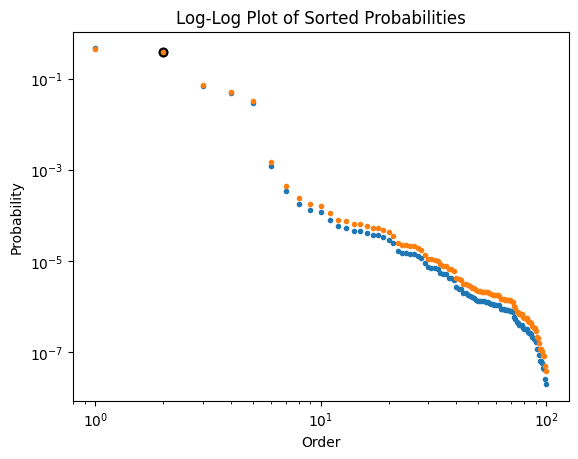

In [ ]:
image_num=2

min_prob = (image_num - 1) * 100
max_prob = image_num * 100

probabilities_temp = probs_temp[min_prob:max_prob]
labels_hot_temp = labels_temp[min_prob:max_prob]
sorted_probabilities_temp = np.sort(probabilities_temp)[::-1]
ranks_temp = np.arange(1, len(sorted_probabilities_temp)+1)
probabilities = probs[min_prob:max_prob]
labels_hot = labels[min_prob:max_prob]
sorted_probabilities = np.sort(probabilities)[::-1]
ranks = np.arange(1, len(sorted_probabilities)+1)

fig, ax = plt.subplots()
ax.loglog(ranks, sorted_probabilities, '.')
ax.scatter(ranks[np.where(sorted_probabilities==probabilities[np.where(labels_hot==1)])[0]],probabilities[np.where(labels_hot==1)],color='black')
ax.set_xlabel('Order')
ax.set_ylabel('Probability')
ax.set_title('Log-Log Plot of Sorted Probabilities')
ax.loglog(ranks_temp, sorted_probabilities_temp, '.')
ax.scatter(ranks_temp[np.where(sorted_probabilities_temp==probabilities_temp[np.where(labels_hot_temp==1)])[0]],probabilities_temp[np.where(labels_hot_temp==1)],color='black')
ax.set_xlabel('Order')
ax.set_ylabel('Probability')
ax.set_title('Log-Log Plot of Sorted Probabilities')
plt.show()


#**Information about the probabilities VANILA MODEL**

In [ ]:
from sklearn.metrics import r2_score

num_blocks = len(probs) // 100
top_num=20

top_probs = np.zeros(num_blocks*top_num)
sorted_probs = np.zeros(num_blocks*top_num)
top_indices = np.zeros(num_blocks*top_num)
top_labels =np.zeros(num_blocks*top_num)
information = np.zeros((8000,12))

def power_law(x, a, b):
    return a * x ** b
x = np.arange(1,top_num + 1)


for i in range(0,800000,100):
  block = probs[i:i+100]
  labels_block=labels[i:i+100]
  indices = np.argsort(block)[::-1][:top_num]
  top_probs_iter=block[indices]
  top_labels_iter=labels_block[indices]
  if np.sum(top_labels_iter == 1) > 0:
    true_index=np.where(top_labels_iter == 1)[0][0]
    true_prob=top_probs_iter[true_index]

  else:
    true_index=top_num
    true_prob=0

  params, _ = curve_fit(power_law, x, top_probs_iter)
  xfit = np.linspace(min(x), max(x), 100)
  yfit = power_law(xfit, *params)
  residuals = top_probs_iter - power_law(x, *params)
  ssr = np.sum(residuals**2)
  #print("Goodness of fit (SSR):", ssr)
  #slope, intercept, r_value, p_value, std_err = linregress(np.log(x), np.log(top_probs_iter))

  information[int(i/100),0]= params[1]
  information[int(i/100),1]= params[0]
  information[int(i/100),2]=int(true_index)
  information[int(i/100),3]=top_probs_iter[0]
  information[int(i/100),4]=true_prob
  information[int(i/100),5]=ssr
  information[int(i/100),6]=top_probs_iter[0]-top_probs_iter[1]
  information[int(i/100),7]=top_probs_iter[0]-top_probs_iter[2]
  information[int(i/100),8]=top_probs_iter[0]-top_probs_iter[3]
  information[int(i/100),9]=top_probs_iter[0]-top_probs_iter[4]
  information[int(i/100),10]=top_probs_iter[0]-top_probs_iter[5]
  information[int(i/100),11]=np.log(top_probs_iter[0]/top_probs_iter[1])




print(information[0])





[-4.58260490e+00  9.50859708e-01  0.00000000e+00  9.50851619e-01
  9.50851619e-01  1.15807522e-05  9.10587192e-01  9.47501481e-01
  9.48474526e-01  9.48651671e-01  9.50310409e-01  3.16189003e+00]


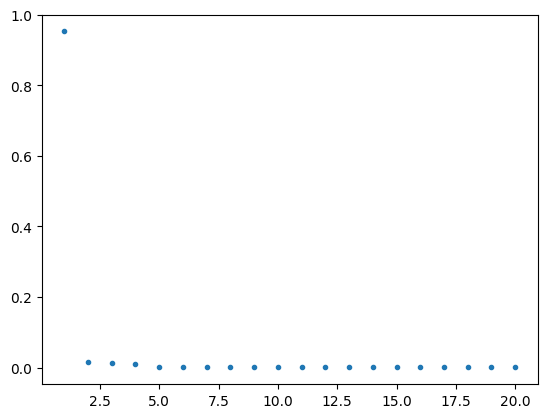

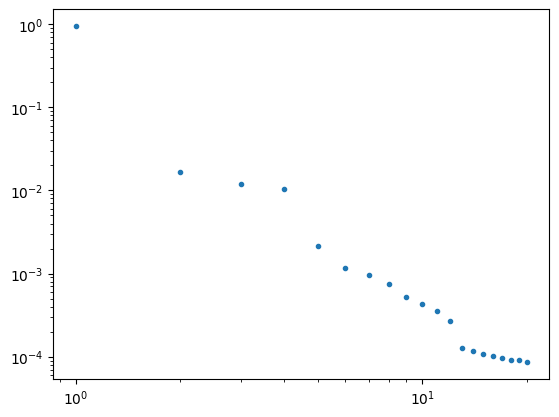

In [ ]:
plt.plot(x,top_probs_iter,'.')
plt.show()

fig, ax = plt.subplots()
ax.loglog(x,top_probs_iter, '.')
plt.show()

In [ ]:
#Worng answers, not top1
correct_information=information[np.where(information[:,2]==0)]
wrong_information=information[np.where(information[:,2]!=0)]
print(len(correct_information))
print(len(wrong_information))

6429
1571


#**Information about the probabilities TEMPERATURE MODEL**

In [ ]:
from sklearn.metrics import r2_score

num_blocks = len(probs_temp) // 100
top_num=20

top_probs_temp = np.zeros(num_blocks*top_num)
sorted_probs_temp  = np.zeros(num_blocks*top_num)
top_indices_temp  = np.zeros(num_blocks*top_num)
top_labels_temp  =np.zeros(num_blocks*top_num)
information_temp = np.zeros((8000,12))

def power_law(x, a, b):
    return a * x ** b
x = np.arange(1,top_num + 1)


for i in range(0,800000,100):
  block_temp  = probs_temp[i:i+100]
  labels_block_temp =labels_temp[i:i+100]
  indices_temp  = np.argsort(block_temp )[::-1][:top_num]
  top_probs_iter_temp =block_temp [indices_temp]
  top_labels_iter_temp =labels_block_temp [indices_temp ]
  if np.sum(top_labels_iter_temp  == 1) > 0:
    true_index_temp =np.where(top_labels_iter_temp  == 1)[0][0]
    true_prob_temp =top_probs_iter_temp [true_index_temp ]
  else:
    true_index_temp = top_num
    true_prob_temp =0

  paramstemp, _ = curve_fit(power_law, x, top_probs_iter_temp)
  xfit = np.linspace(min(x), max(x), 100)
  yfit = power_law(xfit, *paramstemp)
  residuals_temp = top_probs_iter - power_law(x, *paramstemp)
  ssr_temp = np.sum(residuals_temp**2)

  #slope_temp , intercept_temp , r_value_temp , p_value_temp , std_err_temp  = linregress(np.log(x), np.log(top_probs_iter_temp ))

  information_temp[int(i/100),0]=paramstemp[1]
  information_temp[int(i/100),1]= paramstemp[0]
  information_temp[int(i/100),2]=int(true_index_temp )
  information_temp[int(i/100),3]=top_probs_iter_temp [0]
  information_temp[int(i/100),4]=true_prob_temp
  information_temp[int(i/100),5]=ssr_temp
  information_temp[int(i/100),6]=top_probs_iter_temp [0]-top_probs_iter_temp [1]
  information_temp[int(i/100),7]=top_probs_iter_temp [0]-top_probs_iter_temp [2]
  information_temp[int(i/100),8]=top_probs_iter_temp [0]-top_probs_iter_temp [3]
  information_temp[int(i/100),9]=top_probs_iter_temp [0]-top_probs_iter_temp [4]
  information_temp[int(i/100),10]=top_probs_iter_temp [0]-top_probs_iter_temp [5]
  information_temp[int(i/100),11]=np.log(top_probs_iter_temp[0]/top_probs_iter_temp[1])

print(information_temp[0])



[-4.40247910e+00  9.43432102e-01  0.00000000e+00  9.43421125e-01
  9.43421125e-01  9.72143232e-04  8.98102164e-01  9.39257324e-01
  9.40425992e-01  9.40640628e-01  9.42697763e-01  3.03578663e+00]


In [ ]:
#Worng answers, not top1
correct_information_temp=information_temp[np.where(information_temp[:,2]==0)]
wrong_information_temp=information_temp[np.where(information_temp[:,2]!=0)]
print(len(correct_information_temp))
print(len(wrong_information_temp))

6429
1571


#**Comparation**

In [ ]:
print(information[0])
print(information_temp[0])
print('---------------------------------------------------------------')

print(correct_information[0])
print(wrong_information[0])

print('---------------------------------------------------------------')
print(correct_information_temp[0])
print(wrong_information_temp[0])

[-4.58260490e+00  9.50859708e-01  0.00000000e+00  9.50851619e-01
  9.50851619e-01  1.15807522e-05  9.10587192e-01  9.47501481e-01
  9.48474526e-01  9.48651671e-01  9.50310409e-01  3.16189003e+00]
[-4.40247910e+00  9.43432102e-01  0.00000000e+00  9.43421125e-01
  9.43421125e-01  9.72143232e-04  8.98102164e-01  9.39257324e-01
  9.40425992e-01  9.40640628e-01  9.42697763e-01  3.03578663e+00]
---------------------------------------------------------------
[-4.58260490e+00  9.50859708e-01  0.00000000e+00  9.50851619e-01
  9.50851619e-01  1.15807522e-05  9.10587192e-01  9.47501481e-01
  9.48474526e-01  9.48651671e-01  9.50310409e-01  3.16189003e+00]
[-1.35937924  0.50601479  1.          0.46273428  0.38880828  0.04910254
  0.073926    0.39378402  0.41516212  0.43346485  0.46153417  0.17406665]
---------------------------------------------------------------
[-4.40247910e+00  9.43432102e-01  0.00000000e+00  9.43421125e-01
  9.43421125e-01  9.72143232e-04  8.98102164e-01  9.39257324e-01
  9.404

#**Vanila model plots**

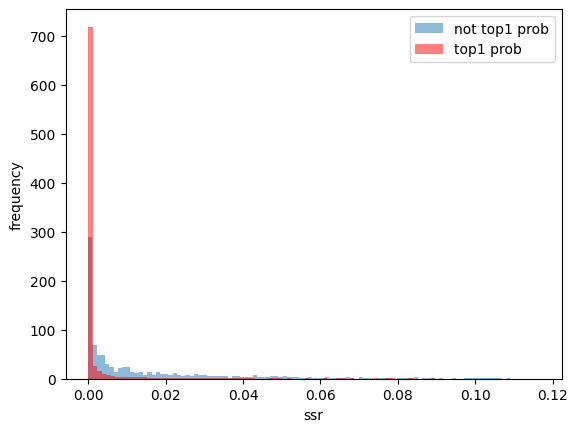

0.10914946620317481
3.196971117325533e-17
0.001091494662031748


In [ ]:
plt.hist(wrong_information[:,5], bins=100, density=True,  label='not top1 prob', alpha=0.5)
plt.hist(correct_information[:,5], bins=100, density=True,color='red', label= 'top1 prob',alpha=0.5)
plt.xlabel('ssr')
plt.ylabel('frequency')
plt.legend()
plt.show()



#print('not top1 prob',np.sum(wrong_information[:,5] > 0.85)/len(wrong_information))
#print('top1 prob', np.sum(correct_information[:,5] > 0.85)/len(correct_information))

print(np.max(wrong_information[:,5]))
print(np.min(wrong_information[:,5]))
print((np.max(wrong_information[:,5])-np.min(wrong_information[:,5]))/100)

0.013630153218429393


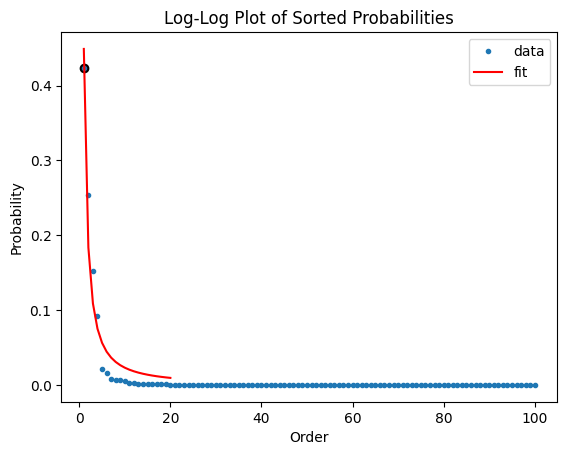

In [ ]:
image_num=5

slope=information[image_num,0]
intercept =information[image_num,1]
x_plot= np.linspace(1,top_num,top_num)
y_plot = intercept*x_plot**slope

min_prob = (image_num) * 100
max_prob = (image_num+1) * 100

probabilities = probs[min_prob:max_prob]
labels_hot = labels[min_prob:max_prob]
sorted_probabilities = np.sort(probabilities)[::-1]
ranks = np.arange(1, len(sorted_probabilities)+1)
"""
fig, ax = plt.subplots()
ax.loglog(ranks, sorted_probabilities, '.', label='data')
ax.loglog(x_plot, y_plot, color='red',  label='fit')
ax.scatter(ranks[np.where(sorted_probabilities==probabilities[np.where(labels_hot==1)])[0]],probabilities[np.where(labels_hot==1)],color='black')
ax.set_xlabel('Order')
ax.set_ylabel('Probability')
ax.set_title('Log-Log Plot of Sorted Probabilities')
plt.legend()
plt.show()
"""
print(information[image_num,5])

fig, ax = plt.subplots()
ax.plot(ranks, sorted_probabilities, '.', label='data')
ax.plot(x_plot, y_plot, color='red',  label='fit')
ax.scatter(ranks[np.where(sorted_probabilities==probabilities[np.where(labels_hot==1)])[0]],probabilities[np.where(labels_hot==1)],color='black')
ax.set_xlabel('Order')
ax.set_ylabel('Probability')
ax.set_title('Log-Log Plot of Sorted Probabilities')
plt.legend()
plt.show()

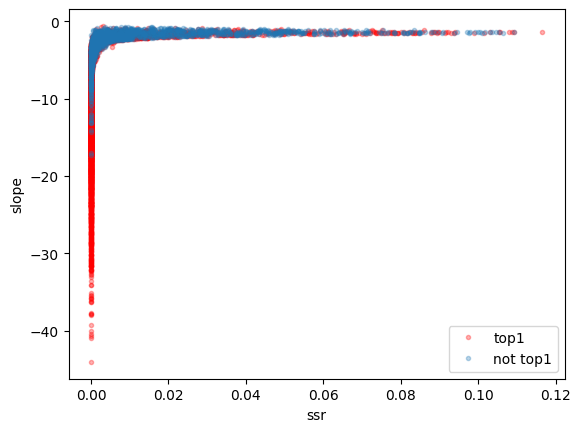

In [ ]:
#plt.plot( wrong_information[:,5],wrong_information[:,0], '.', label='not top1', alpha=0.3)
plt.plot( correct_information[:,5],correct_information[:,0], '.', label='top1', alpha=0.3, color='red')
plt.plot( wrong_information[:,5],wrong_information[:,0], '.', label='not top1', alpha=0.3)
plt.xlabel('ssr')
plt.ylabel('slope')
plt.legend()
plt.show()

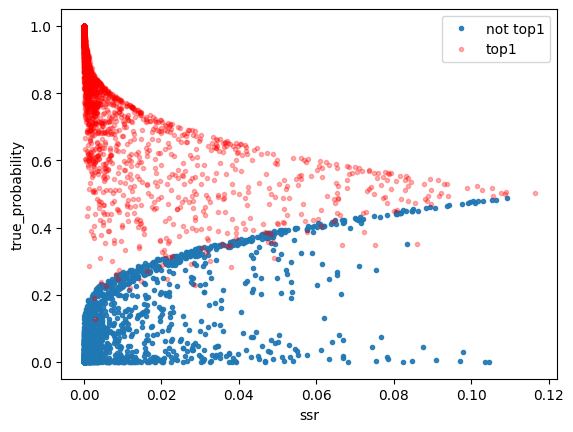

In [ ]:
plt.plot( wrong_information[:,5],wrong_information[:,4], '.', label='not top1', alpha=0.9)
plt.plot( correct_information[:,5],correct_information[:,4], '.', label='top1', alpha=0.3, color='red')
plt.xlabel('ssr')
plt.ylabel('true_probability')
plt.legend()
plt.show()

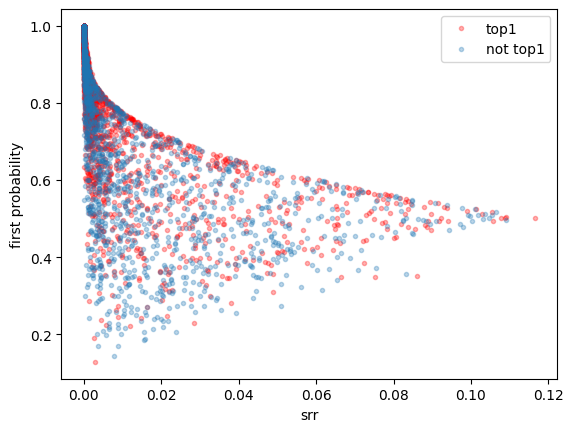

In [ ]:
plt.plot( correct_information[:,5],correct_information[:,3], '.', label='top1', alpha=0.3, color='red')
plt.plot( wrong_information[:,5],wrong_information[:,3], '.', label='not top1', alpha=0.3)
plt.xlabel('srr')
plt.ylabel('first probability')
plt.legend()
plt.show()

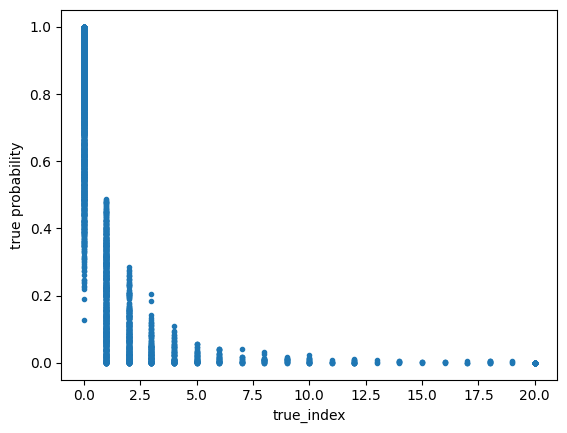

In [ ]:
plt.plot( information[:,2],information[:,4], '.')
plt.xlabel('true_index')
plt.ylabel('true probability')
plt.show()

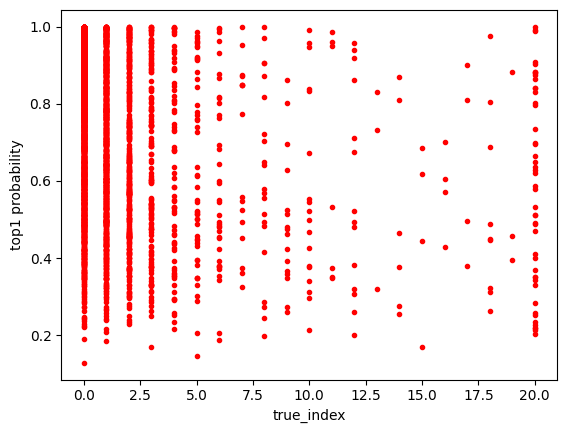

In [ ]:
plt.plot( information[:,2],information[:,3], '.', color='red')
plt.xlabel('true_index')
plt.ylabel('top1 probability')
plt.show()

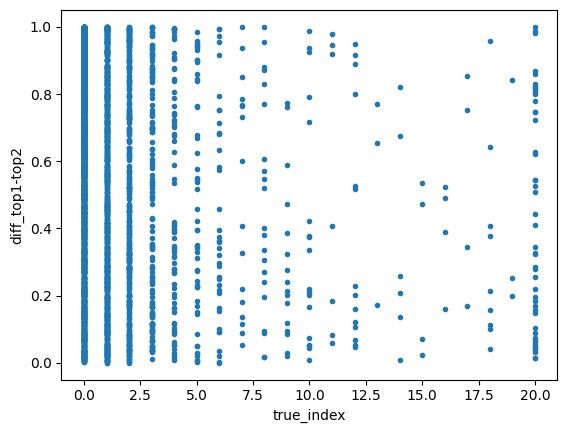

In [ ]:
plt.plot( information[:,2],information[:,6], '.')
plt.xlabel('true_index')
plt.ylabel('diff_top1-top2')
plt.show()

#**Temperature model plots**

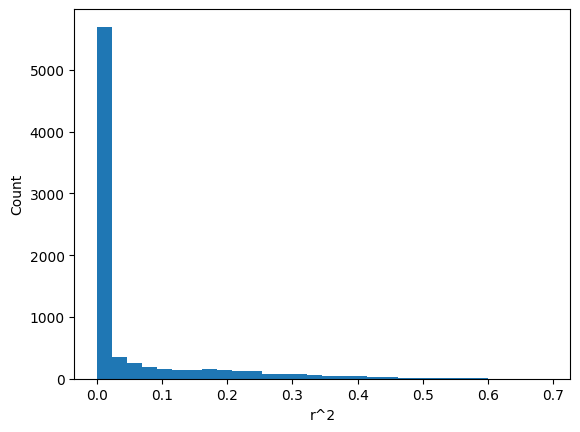

0.0


In [ ]:
plt.hist(information_temp[:,5], bins=30, density=False)
plt.xlabel('r^2')
plt.ylabel('Count')
plt.show()

print( np.sum(information_temp[:,5] > 0.85)/len(information_temp))

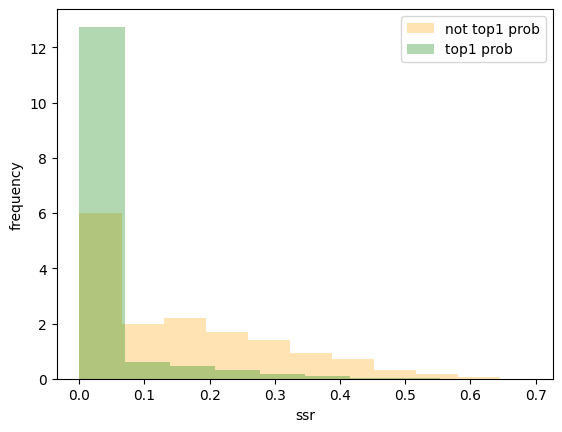

In [ ]:
plt.hist(wrong_information_temp[:,5], bins=10, density=True, color='orange' , label='not top1 prob', alpha=0.3)
plt.hist(correct_information_temp[:,5], bins=10, density=True,color='green', label= 'top1 prob', alpha=0.3)
plt.xlabel('ssr')
plt.ylabel('frequency')
plt.legend()
plt.show()

#print('not top1 prob',np.sum(wrong_information_temp[:,5] > 0.85)/len(wrong_information_temp))
#print('top1 prob', np.sum(correct_information_temp[:,5] > 0.85)/len(correct_information_temp))

-12.300721588662304
-12.814273800020555
0.999632954489254
0.9997476934960718
[9.99632954e-01 1.98131897e-04 1.35177636e-06 3.92706629e-08
 2.52351065e-09 2.67928356e-10 4.02276682e-11 7.78362789e-12
 1.82797027e-12 5.00171540e-13 1.54867069e-13 5.31046454e-14
 1.98396279e-14 7.97331080e-15 3.41247458e-15 1.54275122e-15
 7.31864959e-16 3.62312203e-16 1.86315308e-16 9.91363237e-17]
[9.99747693e-01 1.38806443e-04 7.69002970e-07 1.92720910e-08
 1.10432625e-09 1.06769505e-10 1.48106029e-11 2.67576551e-12
 5.91514811e-13 1.53326284e-13 4.52063465e-14 1.48240354e-14
 5.31514720e-15 2.05632593e-15 8.49444490e-16 3.71507226e-16
 1.70836646e-16 8.21267878e-17 4.10763311e-17 2.12880472e-17]


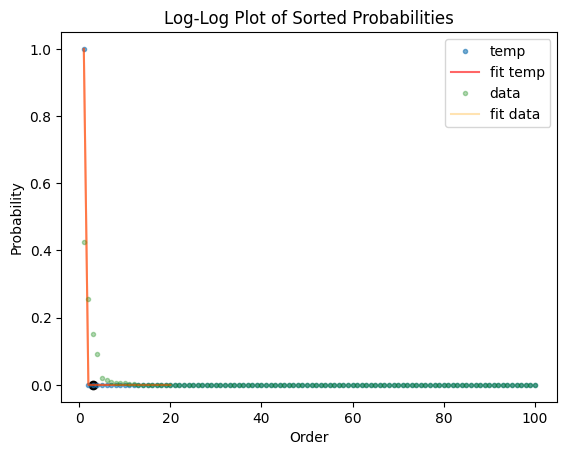

0.0027061496096508534


In [ ]:
image_num=2

slope_temp=information_temp[image_num,0]
print(slope_temp)
slope=information[image_num,0]
print(slope)
intercept_temp=information_temp[image_num,1]
print(intercept_temp)
intercept=information[image_num,1]
print(intercept)


x_plot_temp=np.linspace(1,top_num,top_num)
y_plot_temp=intercept_temp*x_plot_temp**slope_temp
x_plot=np.linspace(1,top_num,top_num)
y_plot=intercept*x_plot**slope

print(y_plot_temp)
print(y_plot)

min_prob = (image_num) * 100
max_prob = (image_num+1) * 100


probabilities_temp = probs_temp[min_prob:max_prob]
labels_hot_temp = labels_temp[min_prob:max_prob]
sorted_probabilities_temp = np.sort(probabilities_temp)[::-1]
ranks_temp = np.arange(1, len(sorted_probabilities_temp)+1)

"""
fig, ax = plt.subplots()
ax.loglog(ranks_temp, sorted_probabilities_temp, '.',label='temp')
ax.loglog(x_plot_temp, y_plot_temp, color='red',  label='fit temp')
ax.scatter(ranks_temp[np.where(sorted_probabilities_temp==probabilities_temp[np.where(labels_hot_temp==1)])[0]],probabilities_temp[np.where(labels_hot_temp==1)],color='black')
ax.loglog(ranks, sorted_probabilities, '.',color='green', label='data')
ax.loglog(x_plot, y_plot, color='orange',  label='fit data')
ax.set_xlabel('Order')
ax.set_ylabel('Probability')
ax.set_title('Log-Log Plot of Sorted Probabilities')
plt.legend()
plt.show()
"""
fig, ax = plt.subplots()
ax.plot(ranks_temp, sorted_probabilities_temp, '.',label='temp', alpha=0.6)
ax.plot(x_plot_temp, y_plot_temp, color='red',  label='fit temp', alpha=0.6)
ax.scatter(ranks_temp[np.where(sorted_probabilities_temp==probabilities_temp[np.where(labels_hot_temp==1)])[0]],probabilities_temp[np.where(labels_hot_temp==1)],color='black')
#ax.plot(ranks, sorted_probabilities, '.',color='green', label='data', alpha=0.3)
#ax.plot(x_plot, y_plot, color='orange',  label='fit data', alpha=0.3)
ax.set_xlabel('Order')
ax.set_ylabel('Probability')
ax.set_title('Log-Log Plot of Sorted Probabilities')
plt.legend()
plt.show()

print(information_temp[image_num,5])

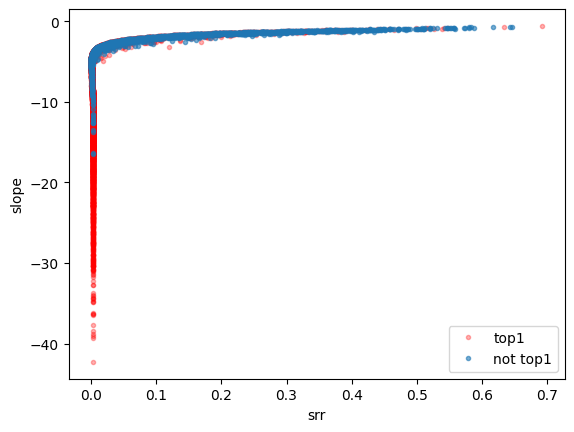

In [ ]:

plt.plot( correct_information_temp[:,5],correct_information_temp[:,0], '.', label='top1', alpha=0.3, color='red')
plt.plot( wrong_information_temp[:,5],wrong_information_temp[:,0], '.', label='not top1', alpha=0.6)
plt.xlabel('srr')
plt.ylabel('slope')
plt.legend()
plt.show()

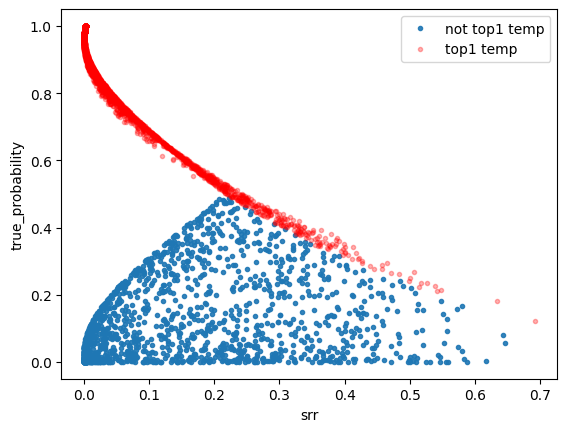

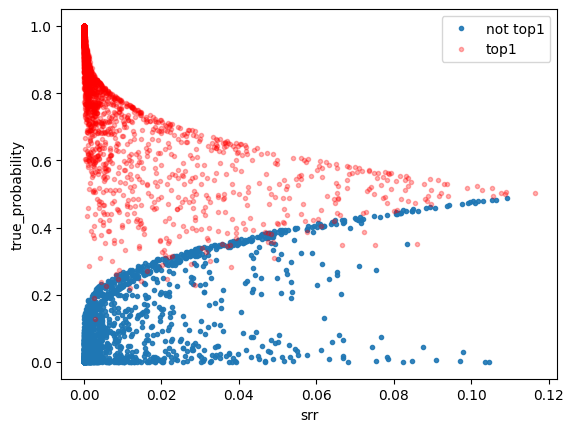

In [ ]:
plt.plot(wrong_information_temp[:,5],wrong_information_temp[:,4], '.', label='not top1 temp', alpha=0.9)
plt.plot( correct_information_temp[:,5],correct_information_temp[:,4], '.', label='top1 temp', alpha=0.3, color='red')
plt.xlabel('srr')
plt.ylabel('true_probability')
plt.legend()
plt.show()

plt.plot(wrong_information[:,5],wrong_information[:,4], '.', label='not top1', alpha=0.9)
plt.plot( correct_information[:,5],correct_information[:,4], '.', label='top1', alpha=0.3, color='red')
plt.xlabel('srr')
plt.ylabel('true_probability')
plt.legend()
plt.show()

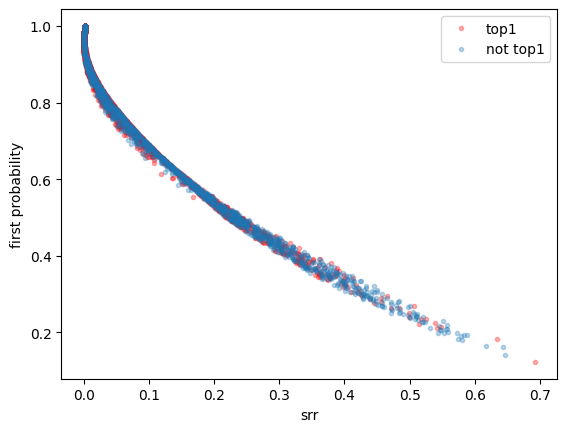

In [ ]:
plt.plot( correct_information_temp[:,5],correct_information_temp[:,3], '.', label='top1', alpha=0.3, color='red')
plt.plot( wrong_information_temp[:,5],wrong_information_temp[:,3], '.', label='not top1', alpha=0.3)
plt.xlabel('srr')
plt.ylabel('first probability')
plt.legend()
plt.show()

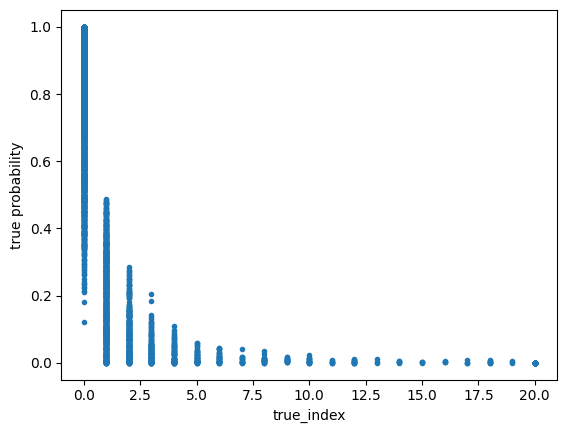

In [ ]:
plt.plot( information_temp[:,2],information_temp[:,4], '.')
plt.xlabel('true_index')
plt.ylabel('true probability')
plt.show()

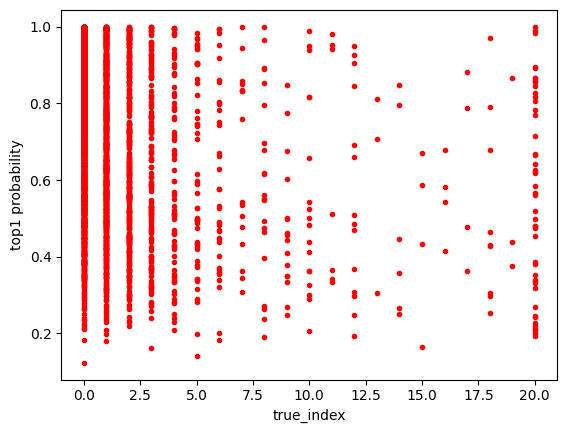

In [ ]:
plt.plot( information_temp[:,2],information_temp[:,3], '.', color='red')
plt.xlabel('true_index')
plt.ylabel('top1 probability')
plt.show()

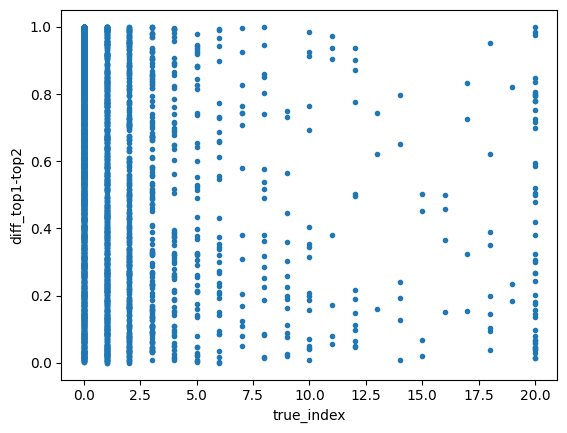

In [ ]:
plt.plot( information_temp[:,2],information_temp[:,6], '.')
plt.xlabel('true_index')
plt.ylabel('diff_top1-top2')
plt.show()

#**Top1 vs top n**

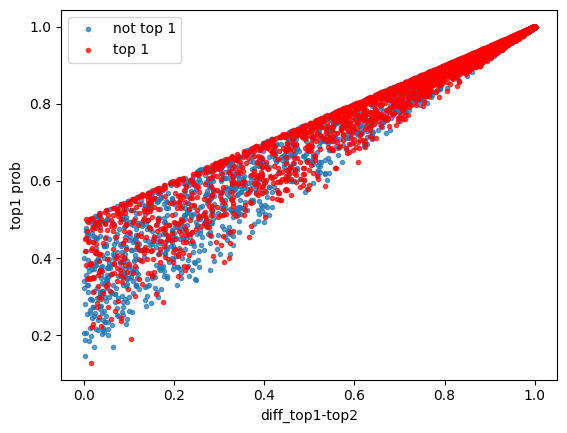

In [ ]:
plt.plot(wrong_information[:,6],wrong_information[:,3], '.', label='not top 1', alpha=0.7)
plt.plot( correct_information[:,6],correct_information[:,3], '.', label='top 1', color='red',alpha=0.7)
plt.ylabel('top1 prob')
plt.xlabel('diff_top1-top2')
plt.legend()
plt.show()

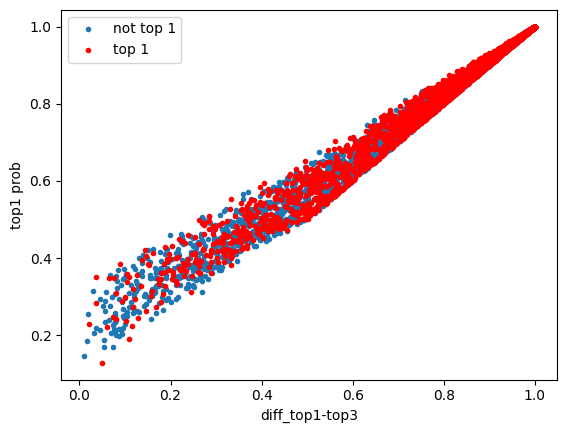

In [ ]:
plt.plot(wrong_information[:,7],wrong_information[:,3], '.', label='not top 1')
plt.plot( correct_information[:,7],correct_information[:,3], '.', label='top 1', color='red')
plt.ylabel('top1 prob')
plt.xlabel('diff_top1-top3')
plt.legend()
plt.show()

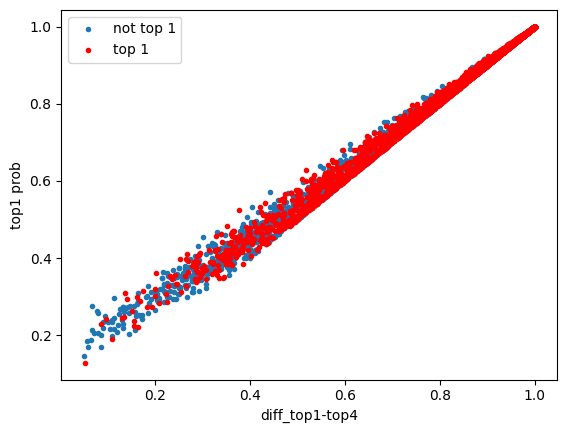

In [ ]:
plt.plot(wrong_information[:,8],wrong_information[:,3], '.', label='not top 1')
plt.plot( correct_information[:,8],correct_information[:,3], '.', label='top 1', color='red')
plt.ylabel('top1 prob')
plt.xlabel('diff_top1-top4')
plt.legend()
plt.show()

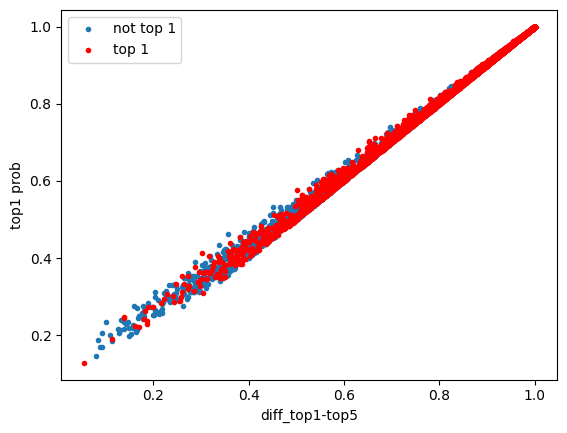

In [ ]:
plt.plot(wrong_information[:,9],wrong_information[:,3], '.', label='not top 1')
plt.plot( correct_information[:,9],correct_information[:,3], '.', label='top 1', color='red')
plt.ylabel('top1 prob')
plt.xlabel('diff_top1-top5')
plt.legend()
plt.show()

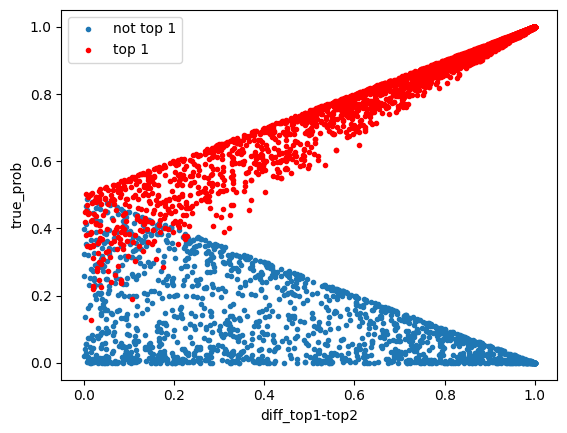

In [ ]:
plt.plot(wrong_information[:,6],wrong_information[:,4], '.', label='not top 1')
plt.plot( correct_information[:,6],correct_information[:,4], '.', label='top 1', color='red')
plt.ylabel('true_prob')
plt.xlabel('diff_top1-top2')
plt.legend()
plt.show()

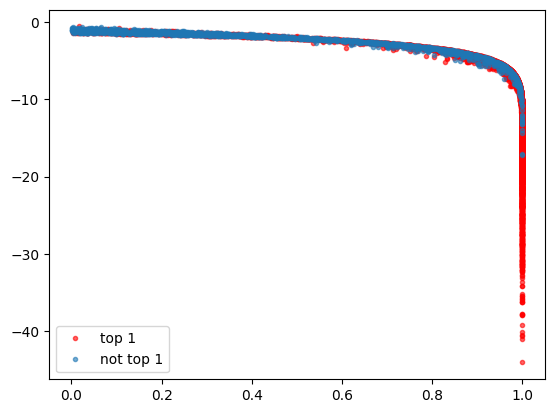

In [ ]:
plt.plot( correct_information[:,6],correct_information[:,0], '.', label='top 1', color='red',alpha=0.6)
plt.plot(wrong_information[:,6],wrong_information[:,0], '.', label='not top 1', alpha=0.6)
#plt.ylabel('true_prob')
#plt.xlabel('diff_top1-top2')
plt.legend()
plt.show()

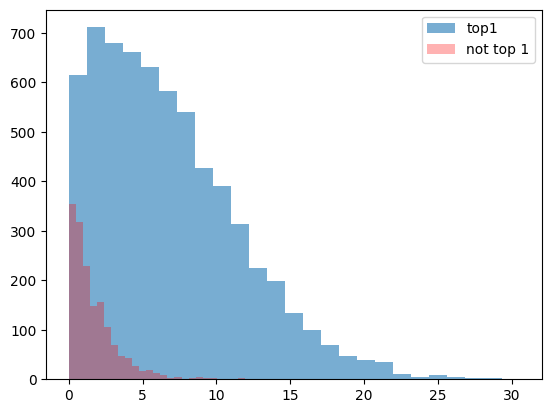

In [ ]:
plt.hist(correct_information[:,11], bins=25, label='top1', alpha=0.6)
plt.hist(wrong_information[:,11], bins=25,color='red', label='not top 1',alpha=0.3)
plt.legend()
plt.show()



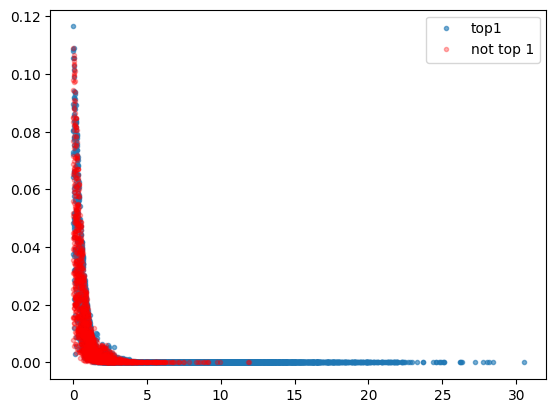

In [ ]:
plt.plot(correct_information[:,11], correct_information[:,5],'.', label='top1', alpha=0.6 )
plt.plot(wrong_information[:,11],wrong_information[:,5],'.' ,color='red', label='not top 1',alpha=0.3)
plt.legend()
plt.show()

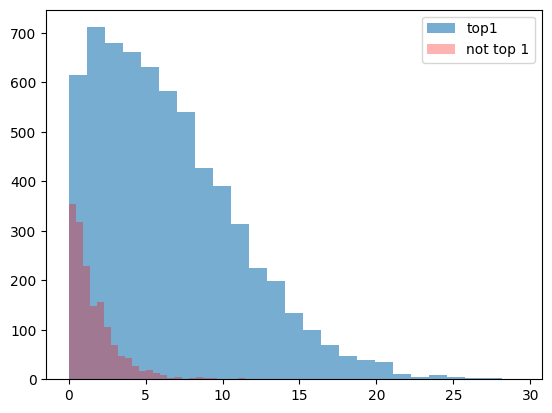

In [ ]:
plt.hist(correct_information_temp[:,11], bins=25, label='top1', alpha=0.6)
plt.hist(wrong_information_temp[:,11], bins=25,color='red', label='not top 1',alpha=0.3)
plt.legend()
plt.show()


In [ ]:
print(correct_information_temp[0,11])
print(correct_information[0,11])

3.0357866287231445
3.1618900299072266


#**Save**

In [ ]:
np.save('wrong_info.npy', wrong_information)
np.save('correct_info.npy', correct_information)
np.save('wrong_info_temp.npy', wrong_information_temp)
np.save('correct_info_temp.npy', correct_information_temp)

#**Accuracy**

In [ ]:
#Accuracy check
top3_information=information[np.where(information[:,2]<2)]
top5_information=information[np.where(information[:,2]<4)]


print('accuracy with top1:', len(correct_information)/len(information))
print('wrong classified:', len(wrong_information)/len(information))
print('accuracy with top3:', len(top3_information)/len(information))
print('accuracy with top5:', len(top5_information)/len(information))


accuracy with top1: 0.803625
wrong classified: 0.196375
accuracy with top3: 0.899375
accuracy with top5: 0.958375


#**Accuracy vanila**

In [ ]:
div=31.2
ssr_discrimination=information[np.where(information[:,5]>(np.max(wrong_information[:,5])-np.min(wrong_information[:,5]))/div)]
ssr_discrimination_bigger=information[np.where(information[:,5]<(np.max(wrong_information[:,5])-np.min(wrong_information[:,5]))/div)]

print(len(ssr_discrimination))
print(len(ssr_discrimination_bigger))
ssr_discrimination_correct=ssr_discrimination[np.where(ssr_discrimination[:,2]==0)]
ssr_discrimination_wrong=ssr_discrimination[np.where(ssr_discrimination[:,2]!=0)]
ssr_discrimination_top2= ssr_discrimination[np.where(ssr_discrimination[:,2]==1)]
ssr_discrimination_top3= ssr_discrimination[np.where(ssr_discrimination[:,2]==2)]
ssr_discrimination_top4= ssr_discrimination[np.where(ssr_discrimination[:,2]==3)]

print('only top1',len(ssr_discrimination_correct))
print('not top1',len(ssr_discrimination_wrong))
print('only top2',len(ssr_discrimination_top2))
print('only top3',len(ssr_discrimination_top3))
print('only top4',len(ssr_discrimination_top4))

print(len(ssr_discrimination_bigger[np.where(ssr_discrimination_bigger[:,2]==0)]))
print(len(ssr_discrimination_bigger[np.where(ssr_discrimination_bigger[:,2]!=0)]))

correct_classified=len(ssr_discrimination_bigger[np.where(ssr_discrimination_bigger[:,2]==0)])+len(ssr_discrimination_wrong)
total=len(information)

print('accuracy:',correct_classified/total)

1593
6407
only top1 734
not top1 859
only top2 435
only top3 184
only top4 73
5695
712
accuracy: 0.81925


#**Accuracy temperature**

In [ ]:
division=0.15
ssr_discrimination_temp=information_temp[np.where(information_temp[:,5]>division)]
ssr_discrimination_temp_bigger=information_temp[np.where(information_temp[:,5]<division)]

print(len(ssr_discrimination_temp))
print(len(ssr_discrimination_temp_bigger))
ssr_discrimination_correct_temp=ssr_discrimination_temp[np.where(ssr_discrimination_temp[:,2]==0)]
ssr_discrimination_wrong_temp=ssr_discrimination_temp[np.where(ssr_discrimination_temp[:,2]!=0)]
ssr_discrimination_top2_temp= ssr_discrimination_temp[np.where(ssr_discrimination_temp[:,2]==1)]
ssr_discrimination_top3_temp= ssr_discrimination_temp[np.where(ssr_discrimination_temp[:,2]==2)]
ssr_discrimination_top4_temp= ssr_discrimination_temp[np.where(ssr_discrimination_temp[:,2]==3)]

print('only top1',len(ssr_discrimination_correct_temp))
print('not top1',len(ssr_discrimination_wrong_temp))
print('only top2',len(ssr_discrimination_top2_temp))
print('only top3',len(ssr_discrimination_top3_temp))
print('only top4',len(ssr_discrimination_top4_temp))

print(len(ssr_discrimination_temp_bigger[np.where(ssr_discrimination_temp_bigger[:,2]==0)]))
print(len(ssr_discrimination_temp_bigger[np.where(ssr_discrimination_temp_bigger[:,2]!=0)]))

correct_classified=len(ssr_discrimination_temp_bigger[np.where(ssr_discrimination_temp_bigger[:,2]==0)])+len(ssr_discrimination_wrong_temp)
total=len(information)

print('accuracy:',correct_classified/total)

1145
6855
only top1 456
not top1 689
only top2 282
only top3 150
only top4 70
5973
882
accuracy: 0.83275


#**Logistic Regression Vanila**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# [ssr, log(diff)]
X1 = information[:,5]#, information[:,11]]
X2 = information[:,11]

X = np.column_stack((X1, X2))

print(len(X))
# 0--> top1
# 1--> no top1

infromation_logistic=information
information[information[:,2] > 1] = 1
y =  information[:,2]
print(len(y))

#X = X.reshape(-1, 1)

8000
8000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.89875


#**Logistic Regression Temp**

In [ ]:
# [ssr, log(diff)]
X1_temp = information_temp[:,5]#, information[:,11]]
X2_temp = information_temp[:,11]


X_temp = np.column_stack((X1_temp, X2_temp, X3_temp ))

print(len(X_temp))
# 0--> top1
# 1--> no top1


information_temp[information_temp[:,2] > 1] = 1
y_temp =  information_temp[:,2]
print(len(y_temp))



8000
8000


In [ ]:
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_temp, y_train_temp)

LogisticRegression()

In [ ]:
y_pred_temp = logreg.predict(X_test_temp)
accuracy = accuracy_score(y_test_temp, y_pred_temp)
print("Accuracy:", accuracy)


Accuracy: 0.898125
